In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy. stats import norm
import statsmodels.api as sm
import scipy. stats as stats
import scipy.stats


Моделировать 1000 реализаций с.в. X ∼ Γ(10, 1).

а) Построить на одном графике гистограмму
и плотность распределения Γ(10, 1), построить Q-Q-plot.

б) Построить на одном графике гисто-
грамму и плотность распределения N (10, 10), построить Q-Q-plot.

In [ ]:
# создадим 1000 значений нормально распределенной величины с матожиданием 0 и 1
r_n = sorted(np.random.normal(10, 10**(1/2), 1000))
df = pd.DataFrame()
df['r_n'] = pd.DataFrame(r_n)

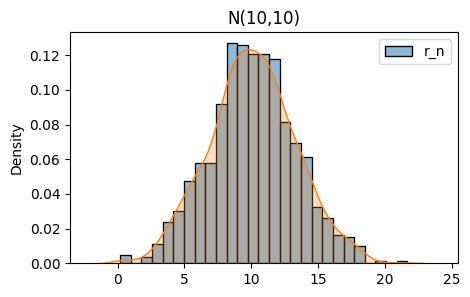

In [ ]:
plt.figure(figsize = (5,3))

sns.histplot(df, stat = 'density').set (title='N(10,10)')
sns.kdeplot(r_n, fill = True)

plt.show()
None

In [ ]:
r_g = sorted(np.random.gamma(10, 1, 1000))
df['r_g'] = pd.DataFrame(r_g)

In [ ]:
df['count'] = [i+1 for i in range(len(df))]
df['percentil_area'] = [df['count'][i]/len(df) for i in range(len(df))]

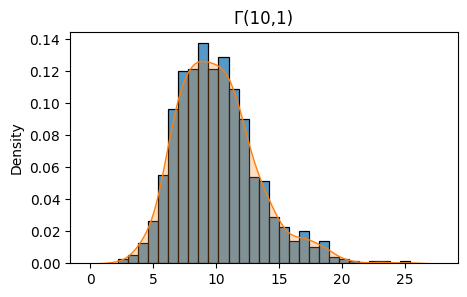

In [ ]:
plt.figure(figsize = (5,3))

sns.histplot(r_g, stat = 'density').set (title='Г(10,1)')
sns.kdeplot(r_g, fill = True)

plt.show()
None

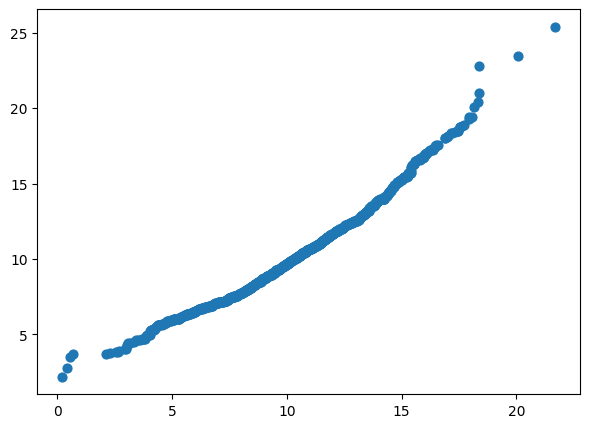

In [ ]:
plt.figure(figsize = (7,5))
plt.scatter(df.r_n,df.r_g, s = 40)
None

In [ ]:
df

,r_n,r_g,count,percentil_area
0,0.202073,2.188660,1,0.001
1,0.423044,2.796263,2,0.002
2,0.554607,3.488443,3,0.003
3,0.696059,3.697012,4,0.004
4,2.140436,3.723740,5,0.005
...,...,...,...,...
995,18.327679,20.395741,996,0.996
996,18.355115,21.035851,997,0.997
997,18.379739,22.790672,998,0.998
998,20.063935,23.484317,999,0.999


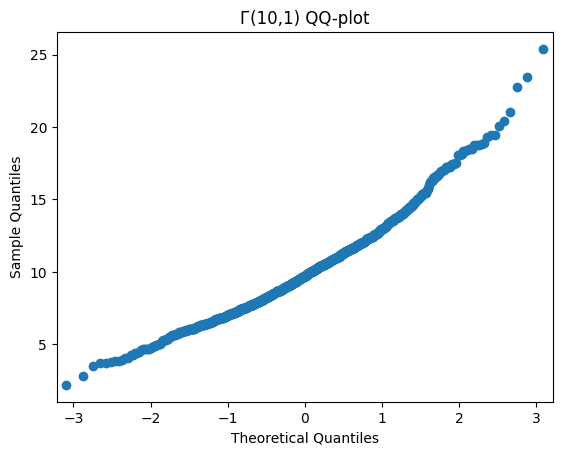

In [ ]:
fig = sm.qqplot(df['r_g'])
plt.title('Г(10,1) QQ-plot')

plt.show()

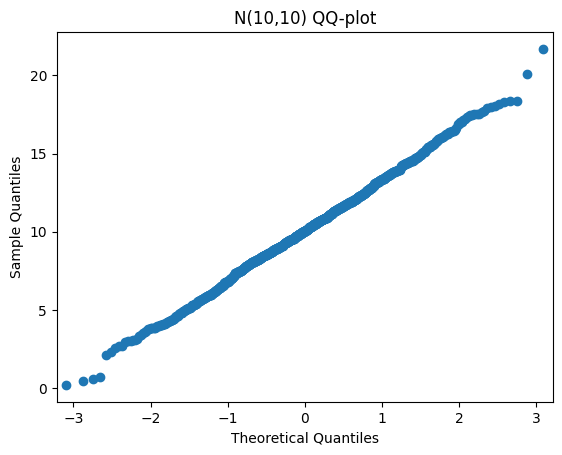

In [ ]:
fig = sm.qqplot(df['r_n'])
plt.title('N(10,10) QQ-plot')
plt.show()

2.Для выборки из файла kiama

а) построить гистограмму, выбрать по ней наиболее подходящее
распределение из следующего списка: экспоненциальное, гамма с параметром формы a = 2, нормальное,

б) построить Q-Q-plot (используя выбранное в п.а) распределение), сделать выводы.

In [ ]:
df = pd.read_csv('kiama.txt')

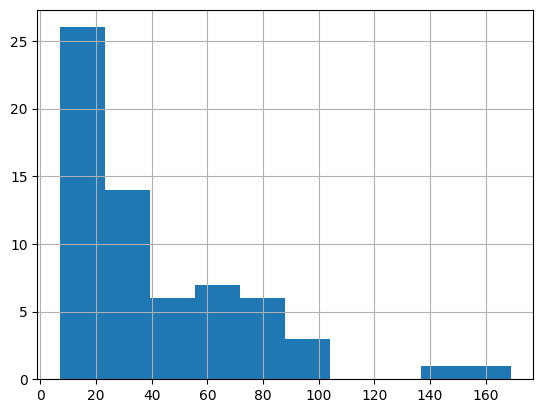

In [ ]:
h = df['Interval'].hist()
fig = h.get_figure()

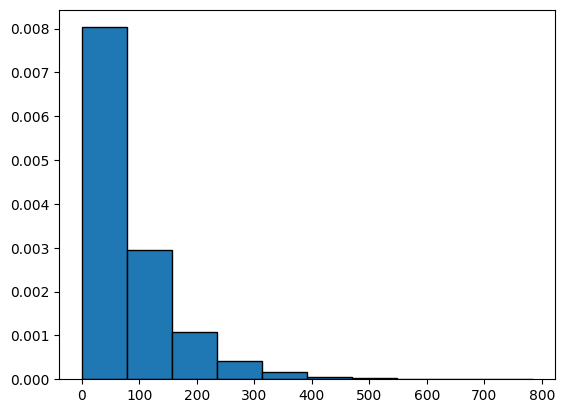

In [ ]:
x = stats.expon.rvs (size= 10000 )
plt.hist (x, density= True , edgecolor='black')
plt.show()

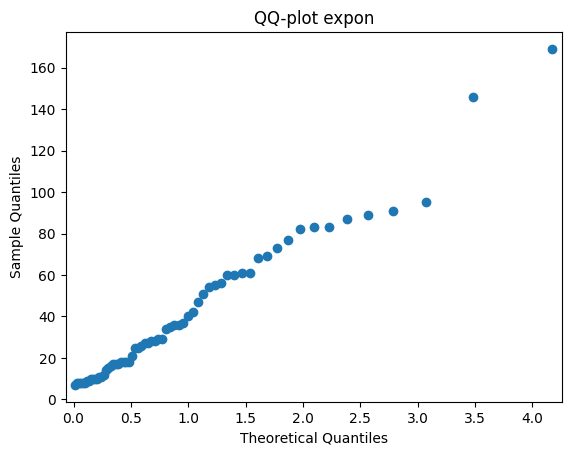

In [ ]:
fig = sm.qqplot(df['Interval'], stats.expon)
plt.title('QQ-plot expon')
plt.show()

3.Сравним предложенные на лекции подходы. Задача: проверить, что выборка из файла Data.csv соответствует нормальному распределению N (0, 1) с помощью

а) гистограммы (наложив на нее график плотности распределения) N (0, 1),

б) P-P-plot,

в) Q-Q-plot.


In [ ]:
data = pd.read_csv('Data.csv', names=['data'])
data

,data
0,-0.680050
1,0.458162
2,0.653154
3,1.474421
4,0.962938
...,...
2996,0.461068
2997,10.633248
2998,-0.368360
2999,1.161864


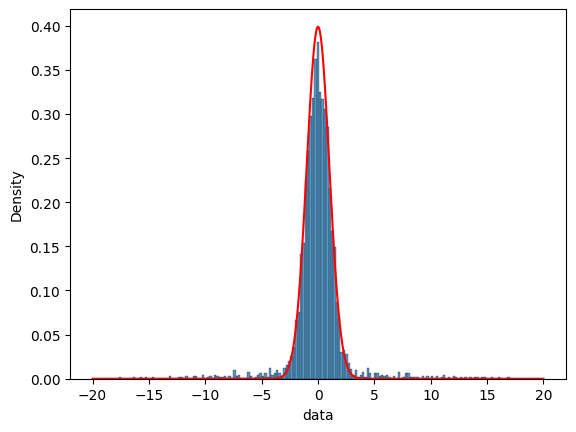

In [ ]:
sns.histplot(data.data,stat='density')
x = np.linspace(-20, 20, 10000)
pdf = stats.norm.pdf(x, loc=0, scale=1)
plt.plot(x,pdf, color='red')

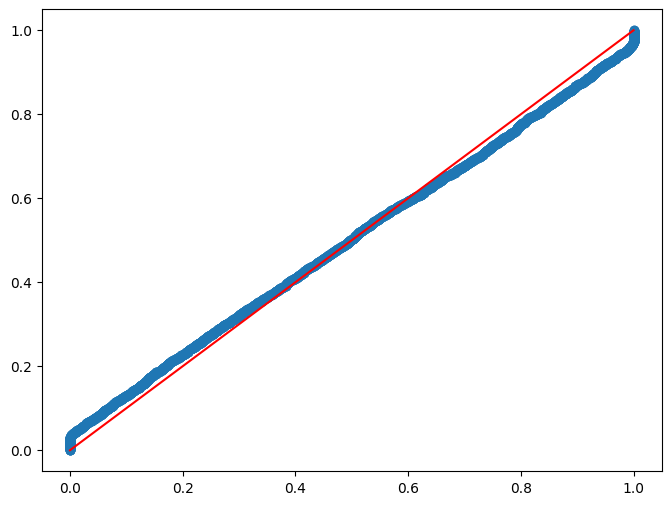

In [ ]:
plt.figure(figsize=(8, 6))
theoretical_cdf = stats.norm.cdf(sorted(data.data), loc=0, scale=1)
data_cdf = np.arange(1, len(data.data) + 1) / len(data.data)
plt.scatter(theoretical_cdf, data_cdf)
plt.plot([0, 1], [0, 1], color='r')
plt.show()

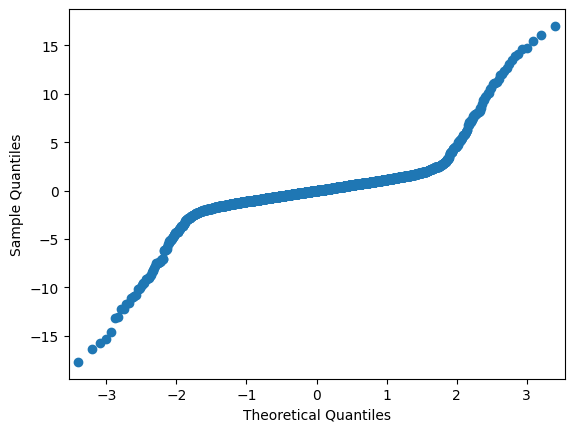

In [ ]:
fig = sm.qqplot(data.data, dist=stats.distributions.norm(0,1))